In [ ]:
import os
import random
import pandas as pd
import json
from typing import Union
import lotus
from lotus.models import LM, CLIPModelRetriever
from IPython.display import Image, display
from IPython.core.display import HTML
from lotus.utils import base64_to_image

# set up lotus
lm = LM(api_key="API KEY")
rm = CLIPModelRetriever(model="openai/clip-vit-large-patch14")
lotus.settings.configure(lm=lm, rm=rm)

In [ ]:
# method for creating a dataframe with random images urls
def create_image_url_dataframe(N: int) -> pd.DataFrame:
    data = {'image_url': []}
    for _ in range(N):
        data['image_url'].append('https://picsum.photos/200/300')
    df = pd.DataFrame(data)
    return df

17:40:59 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:40:59,823 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:40:59 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:40:59,826 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:40:59 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:40:59 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:40:59,833 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:40:59,835 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:40:59 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:40:59,837 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:41:01,493 - INFO

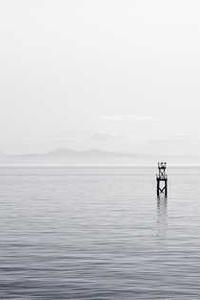

'The subject of the image appears to be a solitary structure, likely a pier or platform, standing in calm water with a misty or foggy background. The overall tone is serene and minimalistic, emphasizing the tranquility of the scene.'

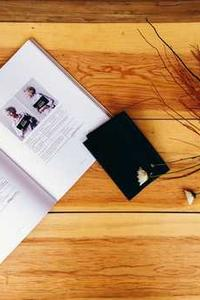

'The image shows an open book with text and images on a wooden surface, alongside a small black item and some dried flowers or twigs. The overall composition suggests a cozy or artistic setting, possibly related to reading or journaling.'

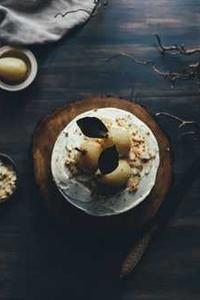

'The subject of the image is a cake, likely decorated with fruit and possibly nuts, presented on a wooden surface.'

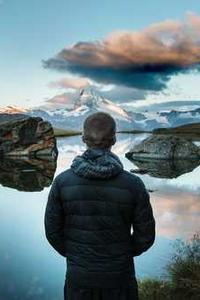

'The image features a person standing with their back to the viewer, looking out over a serene landscape that includes mountains, clouds, and a reflective body of water. The scene conveys a sense of tranquility and connection with nature.'

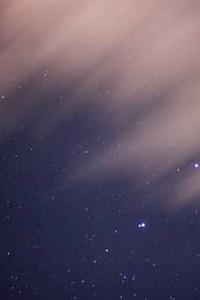

'The subject of the image is a night sky filled with stars and clouds.'

In [23]:
# just a simple sem_map to get the subject of the images

df = create_image_url_dataframe(5)

df.load_images("image_url", "image")

res = df.sem_map("What is the subject of the image {image}?", suffix="image_map")

#loop through df and pass in the image column to base64_to_image display the image
for i in range(len(res)):
    display(base64_to_image(res['image'][i]))
    display(res['image_map'][i])

100%|██████████| 1/1 [00:00<00:00, 35.71it/s]


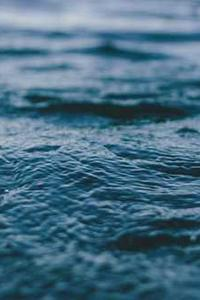

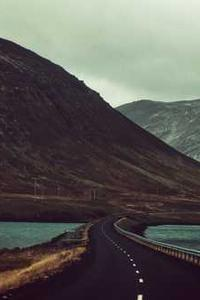

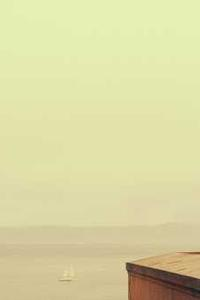

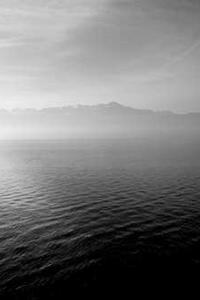

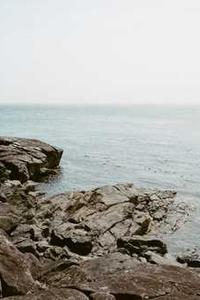

In [27]:
# demonstrating the use of CLIP on a larger image set

df = create_image_url_dataframe(25)

df.load_images("image_url", "image")
df.sem_index("image", "clip_test_index")

res = df.sem_search("image", "Night", 5)
# reset dataframe index to 0
res = res.reset_index(drop=True)

for i in range(len(res)):
    display(base64_to_image(res['image'][i]))

17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:47:50,449 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:47:50,451 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:47:50,456 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:47:50,460 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:47:50 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:47:50,46

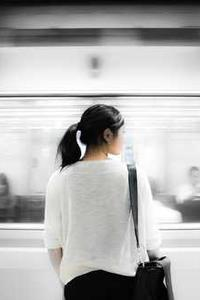

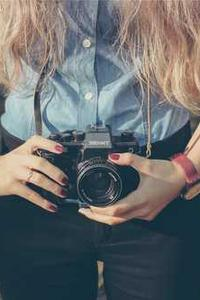

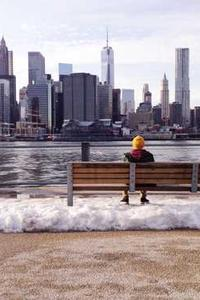

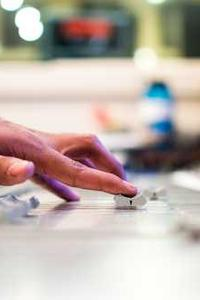

In [28]:
# demonstrating the use of sem_filter

df = create_image_url_dataframe(10)

df.load_images("image_url", "image")

res = df.sem_filter("The {image} shows a person.")
# reset dataframe index to 0
res = res.reset_index(drop=True)

for i in range(len(res)):
    display(base64_to_image(res['image'][i]))

17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:48:42,220 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:48:42,222 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:48:42,230 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:48:42,237 - INFO - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
17:48:42 - LiteLLM:INFO: utils.py:2733 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai
2024-11-20 17:48:42,23

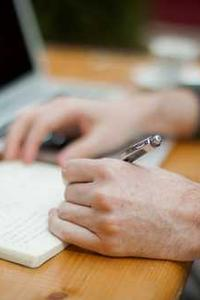

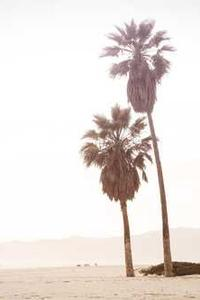

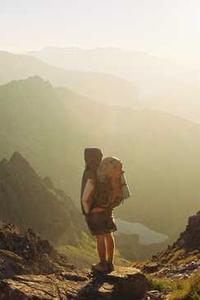

In [29]:
# demonstrating the use of sem_topk

df = create_image_url_dataframe(10)

df.load_images("image_url", "image")

res = df.sem_topk("The {image} was taken in the wintertime.", 3)
# reset dataframe index to 0
res = res.reset_index(drop=True)

for i in range(len(res)):
    display(base64_to_image(res['image'][i]))